In [166]:
from sklearn.linear_model import LinearRegression 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error



In [180]:
# Loading Data

df=pd.read_csv("C:\\Users\\user\\Desktop\\Machine Learning\\DataSets\\weatherHistory.csv")

df.drop("Loud Cover",axis=1,inplace=True)

df.shape

(96453, 11)

Text(0.5, 1.0, 'Features Correlating with Temperature')

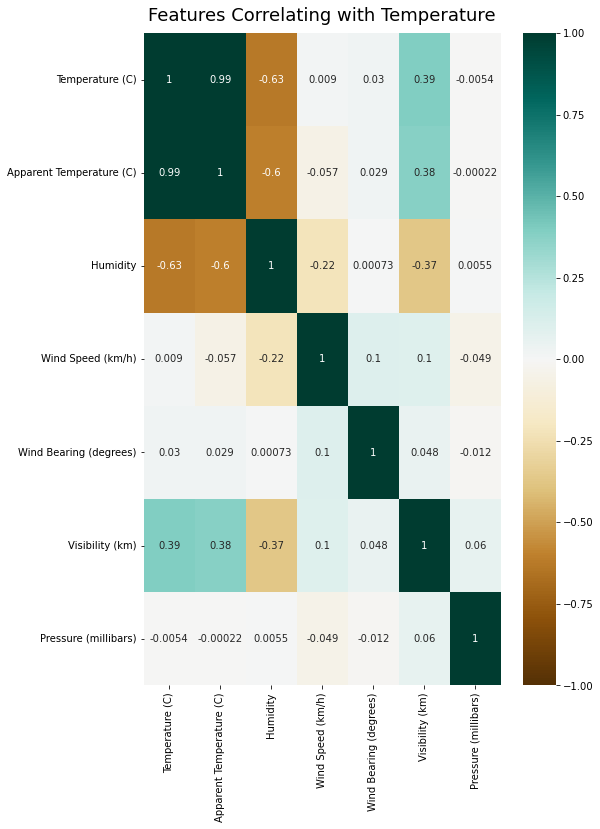

In [168]:
plt.figure(figsize=(8,12))

heatmap=sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,cmap='BrBG')

heatmap.set_title("Features Correlating with Temperature",fontdict={"fontsize":18},pad=12)

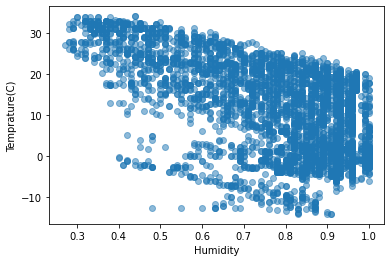

In [169]:
# as we can see from the correlation matrix,we can see that Apparent Temperature and Humidity and Highly Correlated with Temperature

#lets try our model with just the humidity feature


df=df.loc[:5000,['Temperature (C)',"Humidity"]]


X=df["Humidity"].values
Y=df["Temperature (C)"].values

X=X.reshape(-1,1)
Y=Y.reshape(-1,1)


# lets plot Humidity vs Temperatrue

plt.scatter(X,Y,alpha=0.5)
plt.xlabel("Humidity")
plt.ylabel("Temprature(C)")
plt.show()





In [170]:
# from the graph, we can see that Humidity vs Temperature has an inverse linear relationship
# so we will apply Linear Regression Here and check the accuracy

# first we split the data


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=100)



LR=LinearRegression()

LR.fit(X_train,Y_train)




LinearRegression()

In [171]:
y_pred=LR.predict(X_test)

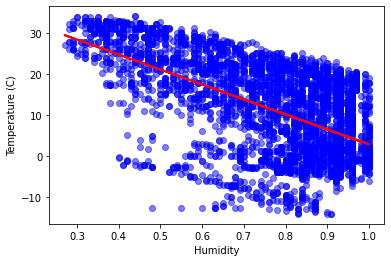

In [172]:
plt.scatter(X,Y,alpha=0.5,color="Blue")
plt.plot(X_test,y_pred,color="Red",linewidth=2)
plt.xlabel("Humidity")
plt.ylabel("Temperature (C)")
plt.show()

In [173]:
#R^2 error check 
print(LR.score(X_train,Y_train))
print(LR.score(X_test,Y_test))

0.3356538541198716
0.32683579305358


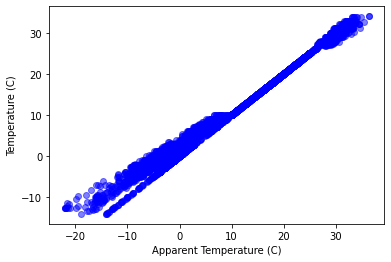

In [174]:
# as we can see from the R^2 score,our model fits poorly

# we will consider the Apparent Temperature Feature instead of Humidity and compare the results
df=pd.read_csv("weatherHistory.csv")

df=df.loc[:5000,["Temperature (C)","Apparent Temperature (C)"]]



X=df.loc[:,"Apparent Temperature (C)"].values
Y=df.loc[:,"Temperature (C)"].values

X=X.reshape(-1,1)
Y=Y.reshape(-1,1)


plt.scatter(X,Y,alpha=0.5,color="Blue")
plt.xlabel("Apparent Temperature (C)")
plt.ylabel("Temperature (C)")
plt.show()




In [175]:
#as we can see from the plot,theres seems to be a strong proportional linear relationship between the the independant and dependant variable

#now lets fit our linear regression model 

# first, we use train test split again

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

lrNew=LinearRegression()

lrNew.fit(X_train,Y_train)

LinearRegression()

In [176]:
y_prednew = lrNew.predict(X_test)
y_prednew

array([[11.19559791],
       [21.79318122],
       [27.85247047],
       ...,
       [17.08698509],
       [22.33145549],
       [21.93639181]])

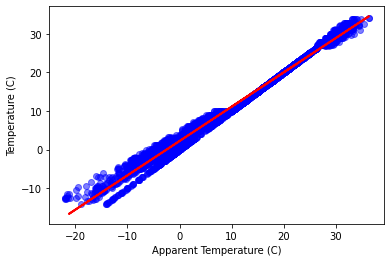

In [177]:
#plot

plt.scatter(X,Y,alpha=0.5,color="blue")
plt.plot(X_test,y_prednew,linewidth=2,color="red")
plt.xlabel("Apparent Temperature (C)")
plt.ylabel("Temperature (C)")
plt.show()

In [178]:
#R^2 result

print(lrNew.score(X_train,Y_train))
print(lrNew.score(X_test,Y_test))
print(mean_squared_error(Y_test,y_prednew))




0.9880213911687458
0.9875155896265311
1.4682630750944172


In [179]:
# the R^2 Result is very good since it is very close to 1 (perfect fit),thus our model performs well